In [1]:
import pandas as pd
import seaborn as sns
import os

In [2]:
# Raw xl counts
DfRawXls = pd.read_csv('../../results/GeneGroups_Quantseq/3UtrLoci/QuantseqGroups_QuantifiedCrosslinks.tsv', sep='\t', index_col=0)

# Sample annotation
DfAnnot = pd.read_csv('../../data/general/SampleAnnotation.csv', index_col=0)

# Library sizes
DfLibsize = pd.read_csv('../../data/general/SampleLibrarySizes.csv', index_col=0)

outpath = '../../results/CharacterizationOfQuantseqGroups/RawXlComparisonBetweenRegions'
os.makedirs(outpath, exist_ok=True)

In [4]:
DfRawXls.head()

,chrom,start,end,name,score,strand,annotation,LIN28A-S200A_ESC_LIF-CHIR-FGF0220626_MM_1.bed.gz,LIN28A-WT_ESC_LIF-CHIR-FGF0220626_MM_1.bed.gz,LIN28A-WT_ESC_LIF-CHIR-FGF0220626_MM_2.bed.gz,...,DOX_C4_Proteintech_2.bed.gz,KO_C1_Crick1.bed.gz,KO_C1_Crick2.bed.gz,KO_C4_Benthyl_1.bed.gz,KO_C4_Benthyl_2.bed.gz,KO_C4_Proteintech_1.bed.gz,KO_C4_Proteintech_2.bed.gz,PABPC1_ESC_DKO_doxGFPLin28A_grouped_cdna_mm39.bed.gz,PABPC1_ESC_DKO_nodox_grouped_cdna_mm39.bed.gz,stable_gene_id
0,chr1,4843433,4846689,CONTROL,-0.221081,-,ENSMUSG00000033845,10,49,59,...,58,231,233,37,12,53,53,22,24,ENSMUSG00000033845
1,chr1,4966584,4968132,DOWN,-1.709470,+,ENSMUSG00000033813,8,11,12,...,23,145,77,8,4,12,41,222,436,ENSMUSG00000033813
2,chr1,9616843,9617680,DOWN,-1.120703,+,ENSMUSG00000061024,27,43,54,...,79,923,603,92,23,65,102,190,579,ENSMUSG00000061024
3,chr1,10094825,10095206,CONTROL,0.359694,-,ENSMUSG00000025917,4,50,30,...,63,339,333,25,13,40,67,42,33,ENSMUSG00000025917
4,chr1,10206367,10206993,CONTROL,-0.109736,+,ENSMUSG00000056763,3,10,11,...,28,153,136,19,7,13,19,133,131,ENSMUSG00000056763


In [5]:
DfRawXls['length'] = DfRawXls.end - DfRawXls.start

In [6]:
ids = ['chrom','start','end','name','score','strand', 'length']
samples = [c for c in DfRawXls.columns if c in DfAnnot.Sample.unique()]

In [7]:
DfRawXls = DfRawXls.melt(id_vars=ids, value_vars=samples, value_name='XlCounts', var_name='Sample')
DfRawXls = DfRawXls.merge(DfAnnot, on='Sample', how='left')
DfRawXls = DfRawXls.merge(DfLibsize, on='Sample', how='left')

In [8]:
DfRawXls['CPM'] = (DfRawXls['XlCounts'] * 10**6).divide(DfRawXls.Libsize, axis='index')

In [9]:
DfRawXls['Xls per kb'] = DfRawXls.XlCounts.divide(DfRawXls.length, axis='index') * 1000
DfRawXls['CPM per kb'] = DfRawXls.CPM.divide(DfRawXls.length, axis='index') * 1000

In [10]:
DfRawXls.head()

,chrom,start,end,name,score,strand,length,Sample,XlCounts,Protein,Condition,Experiment,Libsize,CPM,Xls per kb,CPM per kb
0,chr1,4843433,4846689,CONTROL,-0.221081,-,3256,LIN28A-S200A_ESC_LIF-CHIR-FGF0220626_MM_1.bed.gz,10,LIN28A,S200A_FCL,FLAG-IP LIN28A,1131336,8.839107,3.071253,2.714713
1,chr1,4966584,4968132,DOWN,-1.709470,+,1548,LIN28A-S200A_ESC_LIF-CHIR-FGF0220626_MM_1.bed.gz,8,LIN28A,S200A_FCL,FLAG-IP LIN28A,1131336,7.071286,5.167959,4.568014
2,chr1,9616843,9617680,DOWN,-1.120703,+,837,LIN28A-S200A_ESC_LIF-CHIR-FGF0220626_MM_1.bed.gz,27,LIN28A,S200A_FCL,FLAG-IP LIN28A,1131336,23.865589,32.258065,28.513249
3,chr1,10094825,10095206,CONTROL,0.359694,-,381,LIN28A-S200A_ESC_LIF-CHIR-FGF0220626_MM_1.bed.gz,4,LIN28A,S200A_FCL,FLAG-IP LIN28A,1131336,3.535643,10.498688,9.279902
4,chr1,10206367,10206993,CONTROL,-0.109736,+,626,LIN28A-S200A_ESC_LIF-CHIR-FGF0220626_MM_1.bed.gz,3,LIN28A,S200A_FCL,FLAG-IP LIN28A,1131336,2.651732,4.792332,4.235994


/home/klara/anaconda3/envs/JupyterAnalyses/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


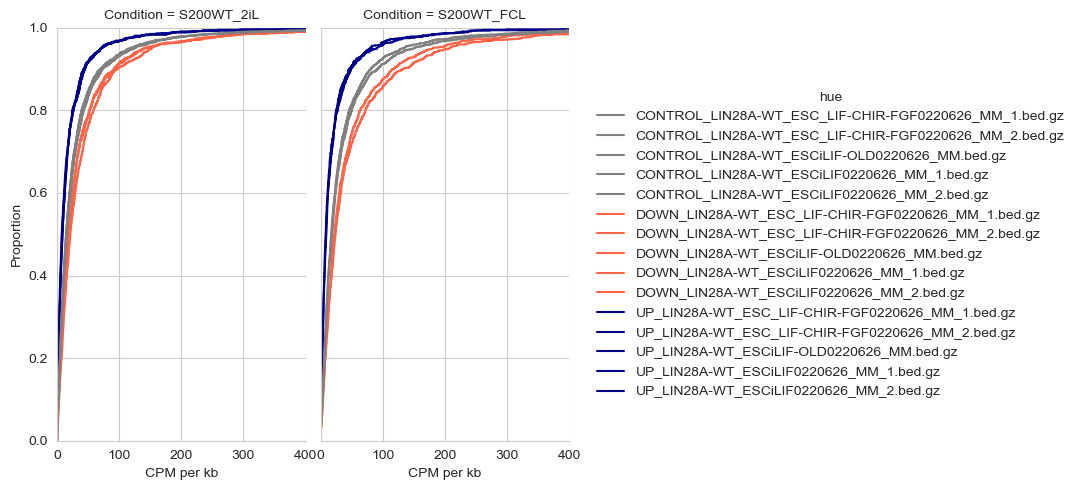

In [12]:
# Plot histograms (xls by kb)
sns.set_style('whitegrid')
dfPlot = DfRawXls.loc[(DfRawXls.Protein == 'LIN28A') & (DfRawXls.Condition != 'S200A_FCL')]
dfPlot['hue'] = dfPlot[['name', 'Sample']].apply(lambda row: '_'.join(row.values), axis='columns')
hue_order = sorted(dfPlot.hue.unique())
palette = []
for h in hue_order:
    if 'CONTROL_' in h:
        c='grey'
    elif 'DOWN_' in h:
        c='tomato'
    else:
        c='darkblue'
    palette.append(c)
g = sns.displot(
    dfPlot, x="CPM per kb", hue="hue", col='Condition', kind='ecdf', col_order=['S200WT_2iL', 'S200WT_FCL'], hue_order=hue_order,
    aspect=0.6, palette=palette)
for ax in g.fig.axes:
    ax.set_xlim(0, 400)
g.fig.savefig(f'{outpath}/ecdf_CPMperKb_EstimationOfBindingInThreeGeneGroups_Lin28A.pdf', bbox_inches='tight')

/home/klara/anaconda3/envs/JupyterAnalyses/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


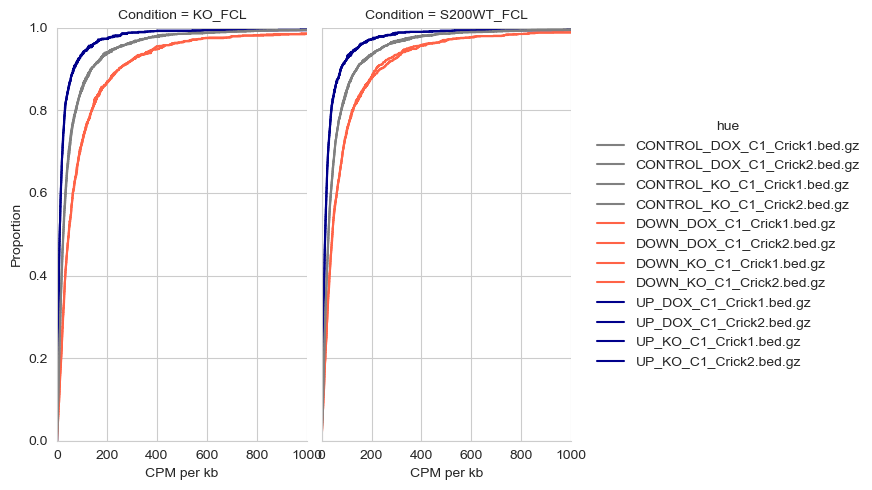

In [14]:
# Plot histograms (xls by kb)
sns.set_style('whitegrid')
dfPlot = DfRawXls.loc[(DfRawXls.Protein == 'PABPC1') & (DfRawXls.Experiment == 'Crick')]
dfPlot['hue'] = dfPlot[['name', 'Sample']].apply(lambda row: '_'.join(row.values), axis='columns')
hue_order = sorted(dfPlot.hue.unique())
palette = []
for h in hue_order:
    if 'CONTROL_' in h:
        c='grey'
    elif 'DOWN_' in h:
        c='tomato'
    else:
        c='darkblue'
    palette.append(c)
g = sns.displot(
    dfPlot, x="CPM per kb", hue="hue", col='Condition', kind='ecdf', col_order=['KO_FCL', 'S200WT_FCL'], hue_order=hue_order,
    aspect=0.6, palette=palette)
for ax in g.fig.axes:
    ax.set_xlim(0, 1000)
g.fig.savefig(f'{outpath}/ecdf_CPMperKb_EstimationOfBindingInThreeGeneGroups_Pabpc1_Crick.pdf', bbox_inches='tight')

/home/klara/anaconda3/envs/JupyterAnalyses/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


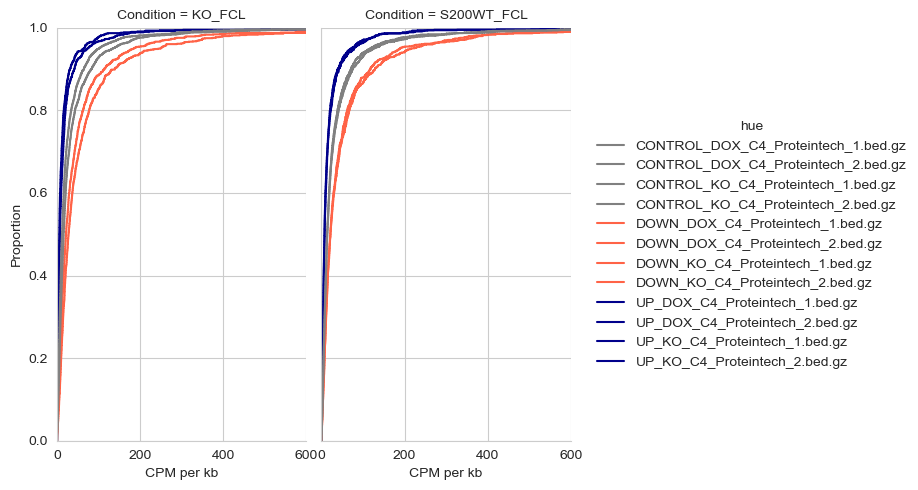

In [16]:
# Plot histograms (xls by kb)
sns.set_style('whitegrid')
dfPlot = DfRawXls.loc[(DfRawXls.Protein == 'PABPC4') & (DfRawXls.Experiment == 'Proteintech')]
dfPlot['hue'] = dfPlot[['name', 'Sample']].apply(lambda row: '_'.join(row.values), axis='columns')
hue_order = sorted(dfPlot.hue.unique())
palette = []
for h in hue_order:
    if 'CONTROL_' in h:
        c='grey'
    elif 'DOWN_' in h:
        c='tomato'
    else:
        c='darkblue'
    palette.append(c)
g = sns.displot(
    dfPlot, x="CPM per kb", hue="hue", col='Condition', kind='ecdf', col_order=['KO_FCL', 'S200WT_FCL'], hue_order=hue_order,
    aspect=0.6, palette=palette)
for ax in g.fig.axes:
    ax.set_xlim(0, 600)
g.fig.savefig(f'{outpath}/ecdf_CPMperKb_EstimationOfBindingInThreeGeneGroups_Pabpc4_Proteintech.pdf', bbox_inches='tight')

In [ ]:
dfPlot

,chrom,start,end,name,score,strand,length,Sample,XlCounts,Protein,Condition,Experiment,Xls per kb,hue
0,chr1,4843433,4846689,CONTROL,-0.221081,-,3256,LIN28A-S200A_ESC_LIF-CHIR-FGF0220626_MM_1.bed.gz,10,LIN28A,S200A_FCL,FLAG-IP LIN28A,3.071253,NaN
1,chr1,4966584,4968132,DOWN,-1.709470,+,1548,LIN28A-S200A_ESC_LIF-CHIR-FGF0220626_MM_1.bed.gz,8,LIN28A,S200A_FCL,FLAG-IP LIN28A,5.167959,NaN
2,chr1,9616843,9617680,DOWN,-1.120703,+,837,LIN28A-S200A_ESC_LIF-CHIR-FGF0220626_MM_1.bed.gz,27,LIN28A,S200A_FCL,FLAG-IP LIN28A,32.258065,NaN
3,chr1,10094825,10095206,CONTROL,0.359694,-,381,LIN28A-S200A_ESC_LIF-CHIR-FGF0220626_MM_1.bed.gz,4,LIN28A,S200A_FCL,FLAG-IP LIN28A,10.498688,NaN
4,chr1,10206367,10206993,CONTROL,-0.109736,+,626,LIN28A-S200A_ESC_LIF-CHIR-FGF0220626_MM_1.bed.gz,3,LIN28A,S200A_FCL,FLAG-IP LIN28A,4.792332,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29251,chrX,163155558,163156007,DOWN,-0.920310,+,449,LIN28A-WT_ESCiLIF0220626_MM_2.bed.gz,28,LIN28A,S200WT_2iL,FLAG-IP LIN28A,62.360802,NaN
29252,chrX,165173028,165174014,CONTROL,-0.076344,-,986,LIN28A-WT_ESCiLIF0220626_MM_2.bed.gz,3,LIN28A,S200WT_2iL,FLAG-IP LIN28A,3.042596,NaN
29253,chrX,165240248,165240706,DOWN,-1.401633,-,458,LIN28A-WT_ESCiLIF0220626_MM_2.bed.gz,69,LIN28A,S200WT_2iL,FLAG-IP LIN28A,150.655022,NaN
29254,chrX,165990088,165990499,DOWN,-3.866227,-,411,LIN28A-WT_ESCiLIF0220626_MM_2.bed.gz,121,LIN28A,S200WT_2iL,FLAG-IP LIN28A,294.403893,NaN
